## An experimentation of Object Detection technologies

Just testing out a few trending and SOTA models on object and face detection to understand them. This will enable me to get useful insights on their use cases then implement optimal model for my problem.

In [1]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
from ultralytics import YOLO
import cv2

In [2]:
# load a pretrained YOLO v8 model from ultralytics
model = YOLO('yolov8n.pt') # 'yolov8n.yaml' for new model from scratch
model2 = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

In [3]:
IMAGES_TO_TRAIN = "../data/images"
labels = ["ashmit"]
number_images = 40

In [4]:
import time
import os
from uuid import uuid1

# if cam:
#     cam.release()
#     cv2.destroyAllWindows()
cam = cv2.VideoCapture(0)
if (cam.isOpened() == False): 
    print("Error reading video file")
    cam.release()
    cv2.destroyAllWindows()
else:
    try:
        for label in labels:
            print (f"capturing Images for {label}")
            time.sleep(5)
            for i in range(number_images):
                ret, frame = cam.read()
                imagename = str(uuid1())+".jpg"
                file_folder = os.path.join(IMAGES_TO_TRAIN,label)

                filepath = os.path.join(file_folder,imagename)
                print (filepath,f"writing file for {label}",i)

                cv2.imwrite(filepath,frame)
                time.sleep(1)

        cam.release()
        cv2.destroyAllWindows()
    except Exception as e:
        print (e)
        cam.release()
        cv2.destroyAllWindows()



capturing Images for ashmit
../data/images/ashmit/3c392bfa-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 0
../data/images/ashmit/3cd319e0-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 1
../data/images/ashmit/3d6cab14-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 2
../data/images/ashmit/3e0633ba-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 3
../data/images/ashmit/3e9fb0f8-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 4
../data/images/ashmit/3f3930a2-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 5
../data/images/ashmit/3fd2afb6-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 6
../data/images/ashmit/406c3df2-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 7
../data/images/ashmit/4105c314-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 8
../data/images/ashmit/419f4c50-05ba-11ee-84c7-4851c5e7243a.jpg writing file for ashmit 9
../data/images/ashmit/4238d1a4-05ba-11ee-84c7-4851c5e7243a.jpg writing file for as

In [42]:
# model.model # to display the architechture of the model itself
# results = model(url/path of the iamge)
# results.print()

# Printing the evaluated image
#plt.imsshow(np.squeeze(results.render())) # np.squeeze here actually remove outer 1 dim array and 
# plt.show()

### the read coding begins here
#### testing the camera using different models
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()



0: 480x640 1 person, 79.4ms
Speed: 1.6ms preprocess, 79.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 3.4ms
Speed: 1.2ms preprocess, 3.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 3.4ms
Speed: 0.6ms preprocess, 3.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 3.4ms
Speed: 0.6ms preprocess, 3.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 3.4ms
Speed: 0.6ms preprocess, 3.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 3.8ms
Speed: 0.6ms preprocess, 3.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 3.7ms
Speed: 0.6ms preprocess, 3.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 4.6ms
Speed: 0.6ms preprocess, 4.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 48

## Train the model

In [4]:
# labelling images
# https://labelstud.io/guide/get_started.html#Quick-start
# pip install label-studio
# training the Yolov8 model
dataset_yaml = "../dataset.yaml"
model.train(data=dataset_yaml,epochs=64,batch=8,imgsz=320,workers=1) # workers is causing bit of a problem in Pytorch now

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7966MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../dataset.yaml, epochs=64, patience=50, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /home/ashmitbhattarai/Codes/face_detection_model_family/data/labels/ashmit/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
val: Scanning /home/ashmitbhattarai/Codes/face_detection_model_family/data/labels/ashmit/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 1 dataloader workers
Logging results to runs/detect/train2
Starting training for 64 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/64     0.715G      2.476      3.937      1.993         23        320: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]
/home/ashmitbhattarai/min

## Load Custom model

In [5]:
new_model = YOLO('/home/ashmitbhattarai/Codes/face_detection_model_family/notebooks/runs/detect/train2/weights/last.pt')

In [9]:
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


0: 256x320 1 ashmit', 1 glasses, 3.7ms
Speed: 0.4ms preprocess, 3.7ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 1 glasses, 3.5ms
Speed: 0.4ms preprocess, 3.5ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 7.1ms
Speed: 0.4ms preprocess, 7.1ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 1 glasses, 5.6ms
Speed: 0.6ms preprocess, 5.6ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 2 glassess, 4.9ms
Speed: 0.6ms preprocess, 4.9ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 2 glassess, 5.8ms
Speed: 0.5ms preprocess, 5.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 2 glassess, 3.4ms
Speed: 0.4ms preprocess, 3.4ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit', 1 glasses, 4.2ms
Speed: 0.4ms pre


image 1/1 /home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ashmit/45d22022-05ba-11ee-84c7-4851c5e7243a.jpg: 256x320 1 ashmit', 3.7ms
Speed: 0.5ms preprocess, 3.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)


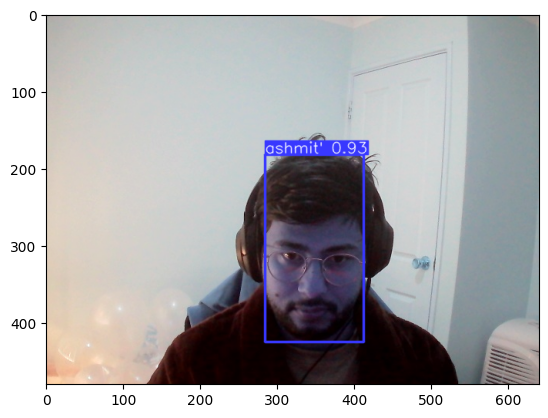

In [8]:
%matplotlib inline
result = new_model('/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ashmit/45d22022-05ba-11ee-84c7-4851c5e7243a.jpg')
# print (result[0])
plt.imshow(np.squeeze(result[0].plot()))
plt.show()